In [1]:
import librosa
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf
import numpy as np

In [2]:
X, fd = librosa.load('sample.wav')

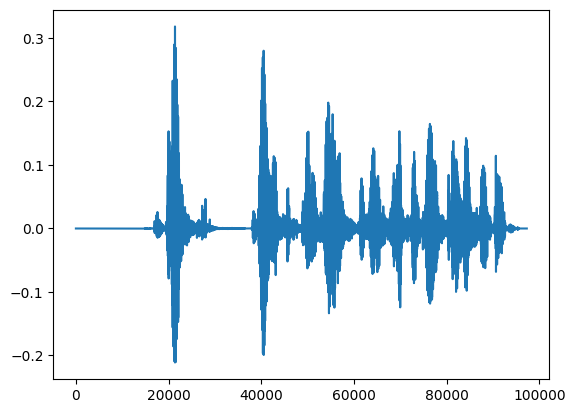

In [3]:
plt.plot(X)

In [4]:
X, _ = librosa.effects.trim(X)

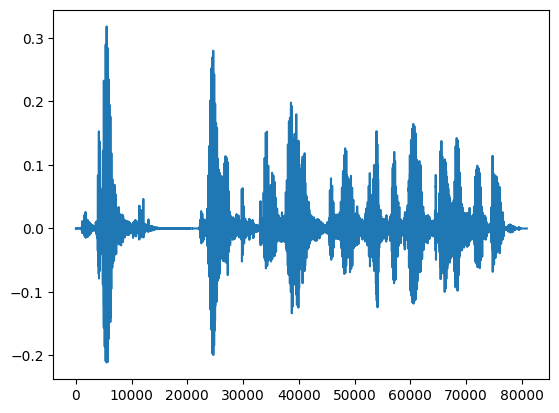

In [5]:
plt.plot(X)

In [43]:
N = [512, 1024, 2048, 4096]
h = [1/4, 1/2, 1]
i = [16, 32, 64, 128, 256]
V = 0

In [44]:
def griffyn_lim(i_, N_, h_, D):
    D_star = D
    for i in range(i_):
        Xt = librosa.istft(D_star, hop_length=h_, n_fft=N_)
        E = librosa.stft(Xt, hop_length=h_, n_fft=N_)
        Phi = np.where(np.abs(E)==0.0, 0, E/np.abs(E))
        D_star = D * Phi
    Xt = librosa.istft(D_star, hop_length=h_, n_fft=N_)
    return np.real(Xt)

In [45]:
for N_ in N:
    for h_ in h:
        for i_ in i:
            Y = librosa.stft(X, n_fft=N_, hop_length=int(N_ * h_))
            D = np.abs(Y)
            X_final = griffyn_lim(i_, N_, int(N_ * h_), D)
            X_final = signal.lfilter([1], [1, -0.97], X_final)
            sf.write('out_N={},h={},i={}.wav'.format(N_, h_, i_), X_final, fd)

/tmp/ipykernel_342/3610300699.py:6: RuntimeWarning: invalid value encountered in divide
  Phi = np.where(np.abs(E)==0.0, 0, E/np.abs(E))


# Вывод
Вывод: из полученного результата, можно сделать вывод о том, что алгоритм Гриффина-Лима очень сильно зависит от величины сдвига при вычислении ДПФ (чем сдвиг меньше, тем лучше качество звука). При сдвиге равному единице получаем очень сильно искаженный звук.
Помимо этого большую роль играет количество итераций алгоритма. Чем больше шагов, тем качество звука лучше.
Алгоритм показал, что размерность ДПФ не играет важной роли. При маленьком сдвиге и большом количестве итераций на всех размерностях восстановленный звук не имеет отличий в звучании на слух.

Ссылка на восстановленные звуки - https://drive.google.com/drive/folders/1aqEL4tNb26jArTJR8jQRc-nmOwe91KLz?usp=sharing